In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msgn

pd.options.display.max_columns = 200

data = pd.read_csv('C:/Users/reayk/Downloads/KaggleV2-May-2016.csv')

# EDA

In [37]:
data.shape

(110527, 14)

In [38]:
data.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [39]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


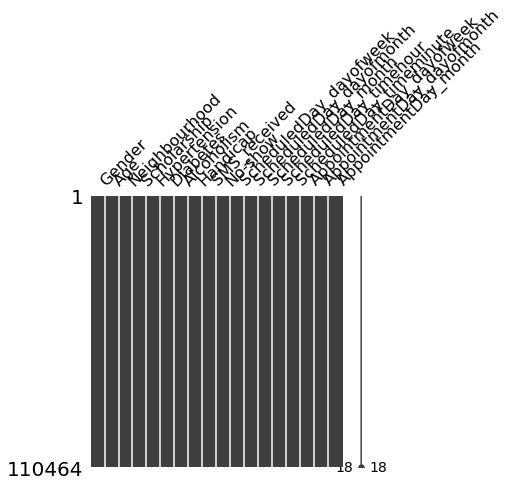

In [79]:
# Checking for missing values

msgn.matrix(data, figsize=(5,5))

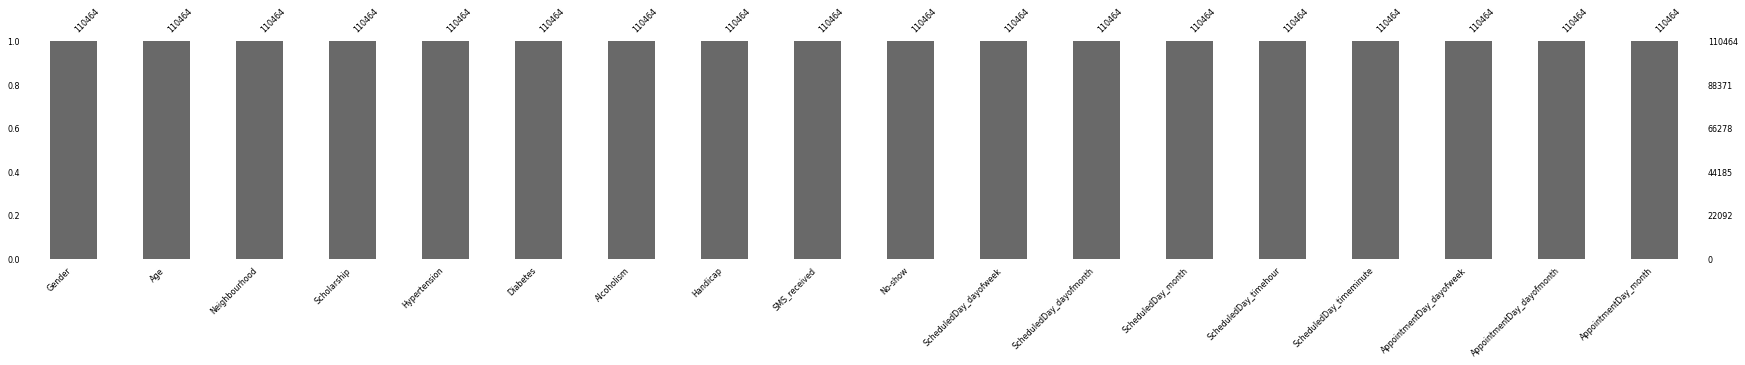

In [80]:
msgn.bar(data, figsize=(30,4), fontsize=8)

In [40]:
# Dropping columns that we will not use for analysis

data.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [41]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [42]:
# Checking the codes used for gender

data['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [43]:
# Dummies for gender

data['Gender'] = data['Gender'].apply(lambda x: 1 if x=='M' else 0).fillna('Unknown')

In [44]:
data['Gender'].head()

0    0
1    1
2    0
3    0
4    0
Name: Gender, dtype: int64

In [45]:
# Making 'No-Show' numerical

data['No-show'] = data['No-show'].apply(lambda x: 1 if x=='Yes' else 0).fillna('Unknown')

In [46]:
data['No-show'].value_counts()

0    88208
1    22319
Name: No-show, dtype: int64

In [47]:
# Fixing spelling errors

data.rename(columns = {'Hipertension': 'Hypertension', 'Handcap': 'Handicap'}, inplace=True)
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


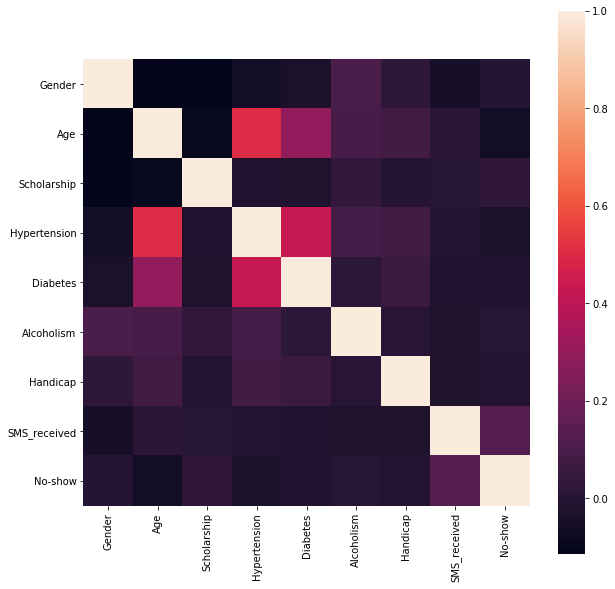

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), square=True, cbar=True)
plt.show()

<Figure size 1440x720 with 0 Axes>

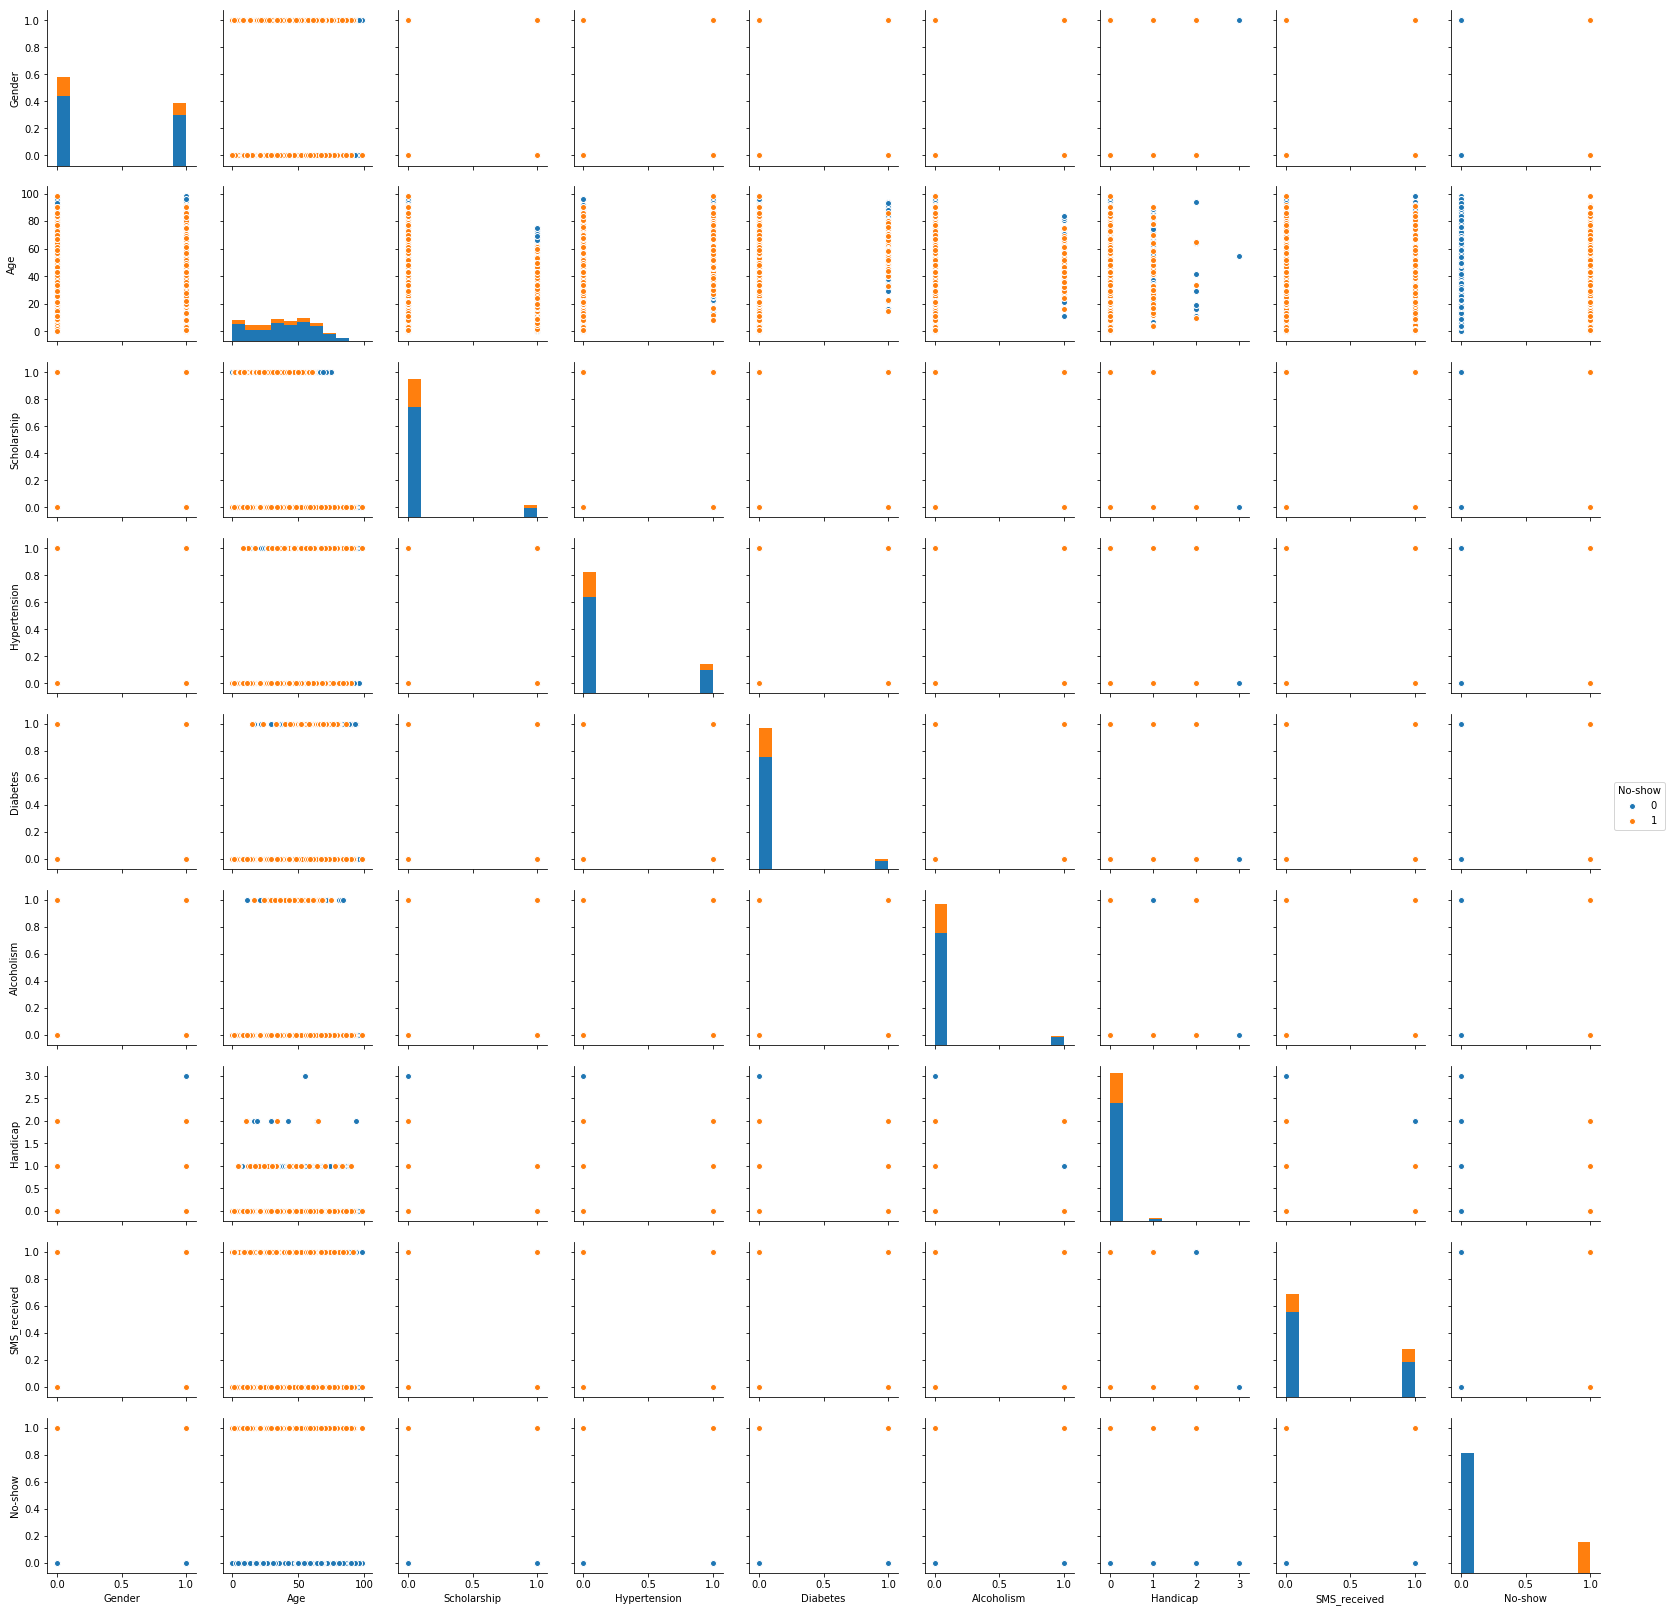

In [49]:
plt.figure(figsize=(20,10))
sns.pairplot(data.head(10000), hue='No-show')
plt.show()

In [50]:
# Formatting dates and times

New_ScheduledDay = pd.to_datetime(data['ScheduledDay'])
New_ScheduledDay.head()

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: ScheduledDay, dtype: datetime64[ns]

In [51]:
data['ScheduledDay_year'] = New_ScheduledDay.dt.year

In [52]:
data['ScheduledDay_dayofweek'] = New_ScheduledDay.dt.day_name()
data['ScheduledDay_dayofweek'].head()

0    Friday
1    Friday
2    Friday
3    Friday
4    Friday
Name: ScheduledDay_dayofweek, dtype: object

In [53]:
data['ScheduledDay_dayofmonth'] = New_ScheduledDay.dt.month
data['ScheduledDay_dayofmonth'].head()

0    4
1    4
2    4
3    4
4    4
Name: ScheduledDay_dayofmonth, dtype: int64

In [54]:
data['ScheduledDay_month'] = New_ScheduledDay.dt.month_name()
data['ScheduledDay_month'].head()

0    April
1    April
2    April
3    April
4    April
Name: ScheduledDay_month, dtype: object

In [55]:
data['ScheduledDay_timehour'] = New_ScheduledDay.dt.hour
data['ScheduledDay_timeminute'] = New_ScheduledDay.dt.minute

In [56]:
data.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,ScheduledDay_year,ScheduledDay_dayofweek,ScheduledDay_dayofmonth,ScheduledDay_month,ScheduledDay_timehour,ScheduledDay_timeminute
0,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016,Friday,4,April,18,38


In [57]:
data.drop(['ScheduledDay'], axis=1, inplace=True)

In [58]:
data.head(1)

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,ScheduledDay_year,ScheduledDay_dayofweek,ScheduledDay_dayofmonth,ScheduledDay_month,ScheduledDay_timehour,ScheduledDay_timeminute
0,0,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016,Friday,4,April,18,38


In [59]:
data['AppointmentDay'].value_counts()

2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:00Z    4520
2016-05-30T00:00:00Z    4514
2016-06-08T00:00:00Z    4479
2016-05-11T00:00:00Z    4474
2016-06-01T00:00:00Z    4464
2016-06-07T00:00:00Z    4416
2016-05-12T00:00:00Z    4394
2016-05-02T00:00:00Z    4376
2016-05-18T00:00:00Z    4373
2016-05-17T00:00:00Z    4372
2016-06-02T00:00:00Z    4310
2016-05-10T00:00:00Z    4308
2016-05-31T00:00:00Z    4279
2016-05-05T00:00:00Z    4273
2016-05-19T00:00:00Z    4270
2016-05-03T00:00:00Z    4256
2016-05-04T00:00:00Z    4168
2016-06-03T00:00:00Z    4090
2016-05-24T00:00:00Z    4009
2016-05-13T00:00:00Z    3987
2016-05-25T00:00:00Z    3909
2016-05-06T00:00:00Z    3879
2016-05-20T00:00:00Z    3828
2016-04-29T00:00:00Z    3235
2016-05-14T00:00:00Z      39
Name: AppointmentDay, dtype: int64

In [60]:
New_AppointmentDay = pd.to_datetime(data['AppointmentDay'])
New_AppointmentDay.head()

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]

In [61]:
data['AppointmentDay_dayofweek'] = New_AppointmentDay.dt.day_name()
data['AppointmentDay_dayofweek'].head()

0    Friday
1    Friday
2    Friday
3    Friday
4    Friday
Name: AppointmentDay_dayofweek, dtype: object

In [62]:
data['AppointmentDay_dayofmonth'] = New_ScheduledDay.dt.month
data['AppointmentDay_dayofmonth'].head()

0    4
1    4
2    4
3    4
4    4
Name: AppointmentDay_dayofmonth, dtype: int64

In [63]:
data['AppointmentDay_month'] = New_AppointmentDay.dt.month_name()
data['AppointmentDay_month'].head()

0    April
1    April
2    April
3    April
4    April
Name: AppointmentDay_month, dtype: object

In [64]:
data.drop(['AppointmentDay'], axis=1, inplace=True)

In [65]:
data.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,ScheduledDay_year,ScheduledDay_dayofweek,ScheduledDay_dayofmonth,ScheduledDay_month,ScheduledDay_timehour,ScheduledDay_timeminute,AppointmentDay_dayofweek,AppointmentDay_dayofmonth,AppointmentDay_month
0,0,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016,Friday,4,April,18,38,Friday,4,April
1,1,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016,Friday,4,April,16,8,Friday,4,April
2,0,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016,Friday,4,April,16,19,Friday,4,April
3,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016,Friday,4,April,17,29,Friday,4,April
4,0,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016,Friday,4,April,16,7,Friday,4,April


In [66]:
# We can see that almost all the data is from 2016. We will drop those rows that are from 2015, and then we can drop the ScheduledDay_year column, as all entries will be the same.
data['ScheduledDay_year'].value_counts()

2016    110465
2015        62
Name: ScheduledDay_year, dtype: int64

In [67]:
data = data[data['ScheduledDay_year']!=2015]
data['ScheduledDay_year'].value_counts()

2016    110465
Name: ScheduledDay_year, dtype: int64

In [68]:
# Now that all entries have the same value for the ScheduledDay_year column, we can drop the column

data.drop(['ScheduledDay_year'], axis=1, inplace=True)

In [69]:
list(data.columns)

['Gender',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMS_received',
 'No-show',
 'ScheduledDay_dayofweek',
 'ScheduledDay_dayofmonth',
 'ScheduledDay_month',
 'ScheduledDay_timehour',
 'ScheduledDay_timeminute',
 'AppointmentDay_dayofweek',
 'AppointmentDay_dayofmonth',
 'AppointmentDay_month']

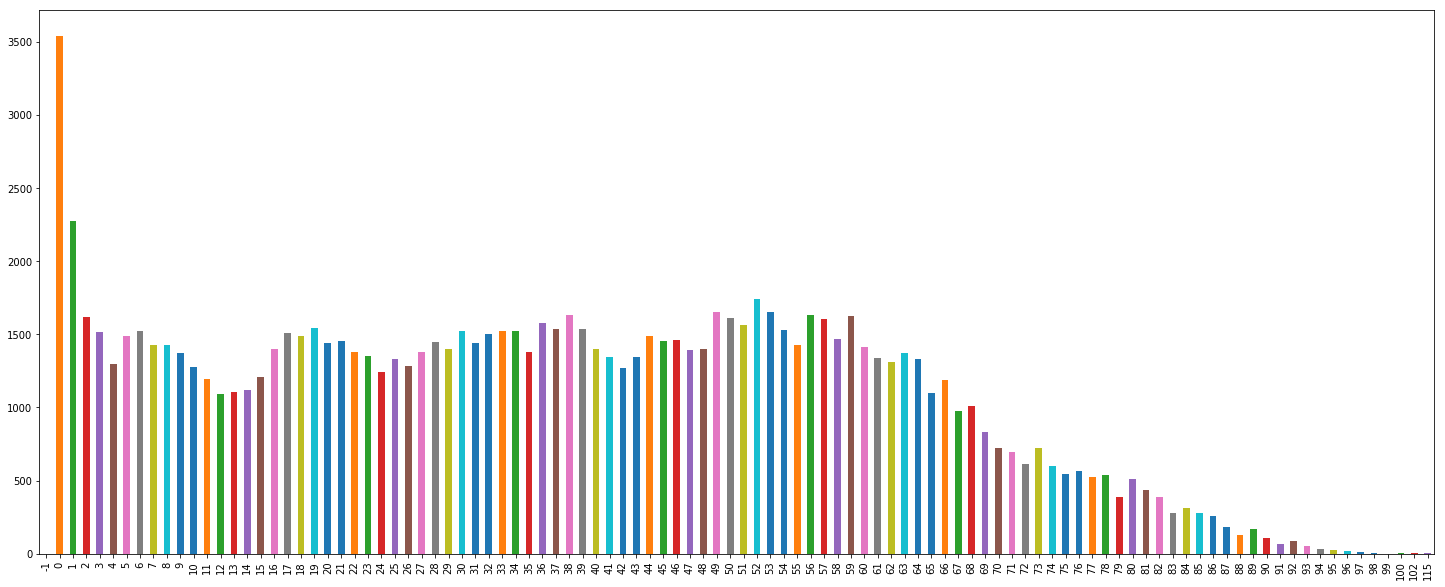

In [70]:
tmp = data['Age'].value_counts().sort_index()
tmp.plot(kind='bar', figsize=(25,10))

In [71]:
# We can see that one of the patients is listed as being aged -1. This may refer to a fetus, or it may be a clerical error - either way we will drop it.

In [72]:
data[data['Age']==-1]

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,ScheduledDay_dayofweek,ScheduledDay_dayofmonth,ScheduledDay_month,ScheduledDay_timehour,ScheduledDay_timeminute,AppointmentDay_dayofweek,AppointmentDay_dayofmonth,AppointmentDay_month
99832,0,-1,ROMÃO,0,0,0,0,0,0,0,Monday,6,June,8,58,Monday,6,June


In [73]:
data = data[data['Age']!=-1]

In [74]:
data.shape

(110464, 18)

from geopy.geocoders import Nominatim

geocoder = Nominatim(user_agent="My-experimental-project-with-healthcare")

geo_dict = {}

from time import sleep

for i, line in enumerate(data['Neighbourhood']):
    if i not in geo_dict.keys():
        sleep(3)
        try:
            geo_dict[i] = geocoder.geocode(line)
            
        except:
           pass

In [75]:
data.to_csv('No_Show_data_prepared.csv', index=False)

In [81]:
!pwd

/c/Users/reayk
